In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [14]:
# Load Dataset & Inspect Features
df = pd.read_csv("mnist_0_to_9_20x20_5000.csv")

X = df.drop("label", axis=1)
y = df["label"]

print("Dataset shape:", df.shape)
print("Number of features:", X.shape[1])


Dataset shape: (5000, 401)
Number of features: 400


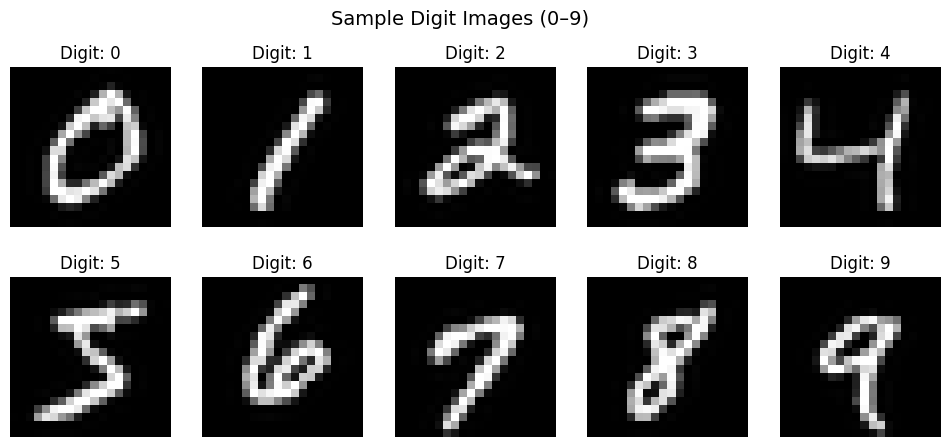

In [15]:
# Visualize Sample Digit Images
fig, axes = plt.subplots(2, 5, figsize=(12,5))

for digit in range(10):
    ax = axes[digit // 5, digit % 5]
    
    # pick first occurrence of each digit
    idx = y[y == digit].index[0]
    
    ax.imshow(X.loc[idx].values.reshape(20,20), cmap='gray')
    ax.set_title(f"Digit: {digit}")
    ax.axis('off')

plt.suptitle("Sample Digit Images (0–9)", fontsize=14)
plt.show()


In [16]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
# PCA – Feature Extraction

# Apply PCA (High → Low Dimension)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

print("Shape after PCA:", X_pca.shape)


Shape after PCA: (5000, 50)


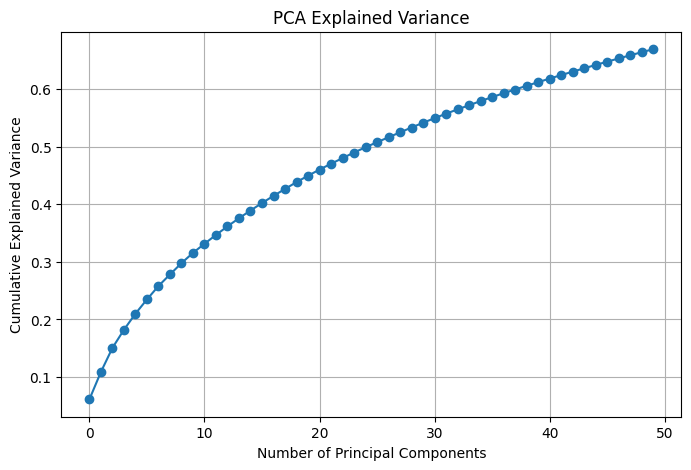

In [18]:
# Explained Variance Graph 
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()


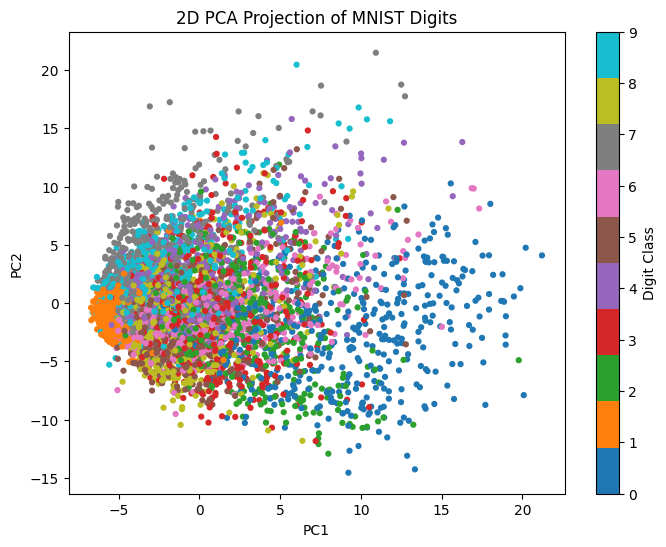

In [19]:
# PCA 2D Visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, cmap="tab10", s=12)
plt.colorbar(label="Digit Class")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Projection of MNIST Digits")
plt.show()


In [20]:
# t-SNE
X_tsne_input = X_pca[:2000]
y_tsne = y[:2000]

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42
)

X_tsne = tsne.fit_transform(X_tsne_input)


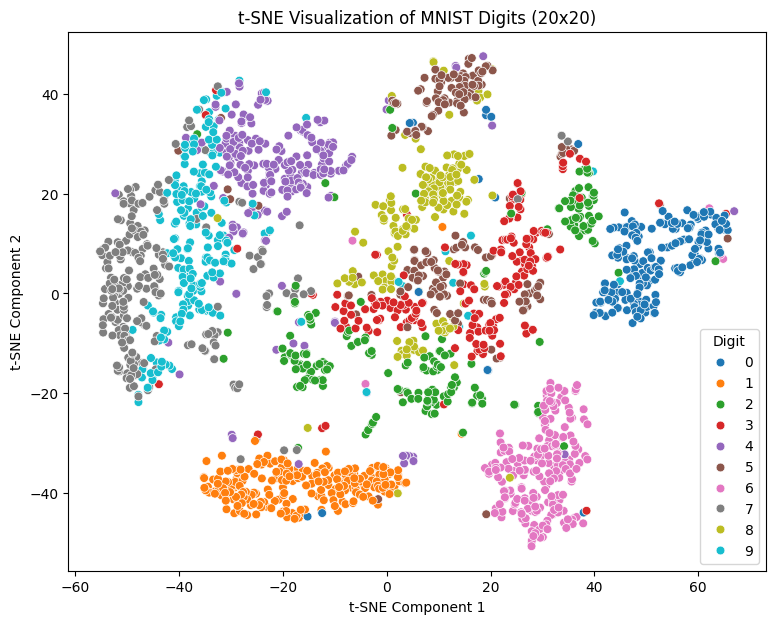

In [21]:
# t-SNE 2D Visualization
plt.figure(figsize=(9,7))
sns.scatterplot(
    x=X_tsne[:,0],
    y=X_tsne[:,1],
    hue=y_tsne,
    palette="tab10",
    s=40
)
plt.title("t-SNE Visualization of MNIST Digits (20x20)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Digit")
plt.show()
